In [1]:
# setting datasets library
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

In [2]:
!pip uninstall -y pyarrow requests
!pip install pyarrow==14.0.1 requests==2.31.0
!pip install datasets

Found existing installation: pyarrow 16.1.0
Uninstalling pyarrow-16.1.0:
  Successfully uninstalled pyarrow-16.1.0
Found existing installation: requests 2.32.3
Uninstalling requests-2.32.3:
  Successfully uninstalled requests-2.32.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.20.0 requires pyarrow>=15.0.0, but you have pyarrow 14.0.1 which is incompatible.
datasets 2.20.0 requires requests>=2.32.2, but you have requests 2.31.0 which is incompatible.
  Using cached pyarrow-16.1.0-cp310-cp310-manylinux_2_28_x86_64.whl (40.8 MB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2

In [4]:
!pip uninstall -y pyarrow requests
!pip install pyarrow==14.0.1 requests==2.31.0 datasets==2.20.0



Found existing installation: pyarrow 16.1.0
Uninstalling pyarrow-16.1.0:
  Successfully uninstalled pyarrow-16.1.0
Found existing installation: requests 2.32.3
Uninstalling requests-2.32.3:
  Successfully uninstalled requests-2.32.3
  Using cached pyarrow-14.0.1-cp310-cp310-manylinux_2_28_x86_64.whl (38.0 MB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install datasets==2.20.0 and pyarrow==14.0.1 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested pyarrow==14.0.1
    datasets 2.20.0 depends on pyarrow>=15.0.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/de

In [6]:
!pip install -U google-colab
!pip install datasets

  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.9.0 requires pyarrow>=8.0.0, which is not installed.
datasets 2.20.0 requires pyarrow>=15.0.0, which is not installed.
pandas-gbq 0.19.2 requires pyarrow>=3.0.0, which is not installed.
tensorflow-datasets 4.9.6 requires pyarrow, which is not installed.
datasets 2.20.0 requires requests>=2.32.2, but you have requests 2.31.0 which is incompatible.
  Using cached pyarrow-16.1.0-cp310-cp310-manylinux_2_28_x86_64.whl (40.8 MB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver

In [7]:
from datasets import load_dataset

# Завантаження датасету IMDb
dataset = load_dataset('imdb')

# Перевірка структури датасету
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [8]:
# Приклад доступу до даних
train_data = dataset['train']
print(train_data[0])

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [44]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout, GRU
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [18]:

# Parametes
max_features = 20000  # vacabulary size
maxlen = 200  # Max lenght of references
batch_size = 32

In [11]:

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


17464789/17464789 [==============================] - 1s 0us/step


In [12]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [13]:

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [47]:
def plot_history(history_object, test_acc=0):
  # Побудова графіку точності
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history_object.history['accuracy'], label='Точність на тренуванні')
  plt.plot(history_object.history['val_accuracy'], label='Точність на валідації')
  plt.xlabel('Епоха')
  plt.ylabel('Точність')
  plt.title('Точність тренування та валідації')
  plt.legend()

  if test_acc != 0:
    # Додавання тестової точності до графіку
    plt.scatter(len(history_object.history['accuracy']), test_acc, label='Точність на тесті', color='red')
    plt.legend()

  # Побудова графіку втрат
  plt.subplot(1, 2, 2)
  plt.plot(history_object.history['loss'], label='Втрати на тренуванні')
  plt.plot(history_object.history['val_loss'], label='Втрати на валідації')
  plt.xlabel('Епоха')
  plt.ylabel('Втрати')
  plt.title('Втрати тренування та валідації')
  plt.legend()

# приклад використання
# plot_history(history_1)

## 1. Мережа LSTM

In [15]:
# Створення LSTM моделі
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 128, input_length=maxlen))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))






In [16]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Навчання моделі
history_lstm1 = lstm_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 224s 355ms/step - loss: 0.4345 - accuracy: 0.8000 - val_loss: 0.4634 - val_accuracy: 0.7754
Epoch 2/5
625/625 [==============================] - 212s 339ms/step - loss: 0.2730 - accuracy: 0.8936 - val_loss: 0.3206 - val_accuracy: 0.8654
Epoch 3/5
625/625 [==============================] - 221s 354ms/step - loss: 0.1820 - accuracy: 0.9315 - val_loss: 0.3289 - val_accuracy: 0.8730
Epoch 4/5
625/625 [==============================] - 220s 351ms/step - loss: 0.1285 - accuracy: 0.9525 - val_loss: 0.3956 - val_accuracy: 0.8614
Epoch 5/5
625/625 [==============================] - 213s 342ms/step - loss: 0.0920 - accuracy: 0.9681 - val_loss: 0.4417 - val_accuracy: 0.8594


In [20]:

predictions = lstm_model.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, In fact: {y_test[i]}")

782/782 [==============================] - 66s 84ms/step
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 0
Predicted: 1, In fact: 1


In [21]:


# quolity score
score, acc = lstm_model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Results of testing:')
print('Тesting loss:', score)
print('Тesting accuracy:', acc)

782/782 [==============================] - 70s 89ms/step - loss: 0.4499 - accuracy: 0.8524
Results of testing:
Тesting loss: 0.4499342441558838
Тesting accuracy: 0.852400004863739


In [ ]:
plot_history(history_lstm1)

In [32]:

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [35]:

# preprocessing, padding sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [36]:

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 200)
x_test shape: (25000, 200)


In [37]:
model_lstm2 = Sequential()
model_lstm2.add(Embedding(max_features, 128, input_length=maxlen))
model_lstm2.add(LSTM(128, recurrent_dropout=0.2, return_sequences=True))
model_lstm2.add(LSTM(64, recurrent_dropout=0.2))
model_lstm2.add(Dense(64, activation='relu'))
model_lstm2.add(Dropout(0.25))
model_lstm2.add(Dense(1, activation='sigmoid'))

In [38]:
model_lstm2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 lstm_5 (LSTM)               (None, 200, 128)          131584    
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2745217 (10.47 MB)
Trainable params: 274

In [39]:
# model compilation
model_lstm2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
history_lstm2 = model_lstm2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 763s 969ms/step - loss: 0.4541 - accuracy: 0.7850 - val_loss: 0.3469 - val_accuracy: 0.8600
Epoch 2/5
782/782 [==============================] - 801s 1s/step - loss: 0.2527 - accuracy: 0.9045 - val_loss: 0.3348 - val_accuracy: 0.8674
Epoch 3/5
782/782 [==============================] - 804s 1s/step - loss: 0.1556 - accuracy: 0.9456 - val_loss: 0.3710 - val_accuracy: 0.8538
Epoch 4/5
782/782 [==============================] - 809s 1s/step - loss: 0.1197 - accuracy: 0.9582 - val_loss: 0.4328 - val_accuracy: 0.8562
Epoch 5/5
782/782 [==============================] - 834s 1s/step - loss: 0.0742 - accuracy: 0.9750 - val_loss: 0.4516 - val_accuracy: 0.8466


In [41]:
predictions = model_lstm2.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, In fact: {y_test[i]}")

782/782 [==============================] - 110s 140ms/step
Predicted: 1, In fact: 0
Predicted: 1, In fact: 1
Predicted: 0, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 0
Predicted: 1, In fact: 1


In [42]:
# quolity score
score, acc = model_lstm2.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Results of testing:')
print('Тesting loss:', score)
print('Тesting accuracy:', acc)

782/782 [==============================] - 110s 140ms/step - loss: 0.4516 - accuracy: 0.8466
Results of testing:
Тesting loss: 0.45158782601356506
Тesting accuracy: 0.8465999960899353


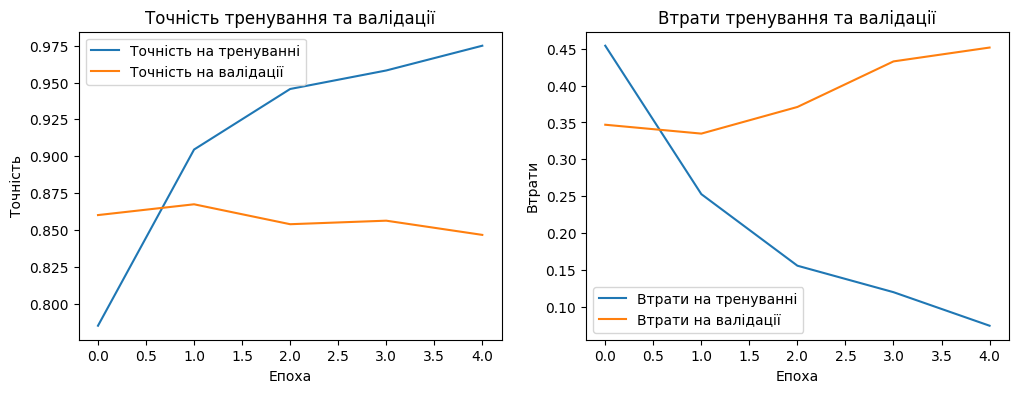

In [48]:
plot_history(history_lstm2)

## 2. Мережа RNN

In [50]:
# Створення RNN моделі
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 128, input_length=maxlen))
#rnn_model.add(SimpleRNN(64))
model_rnn.add(SimpleRNN(128, recurrent_dropout=0.2, return_sequences=True))
model_rnn.add(SimpleRNN(64, recurrent_dropout=0.1))
model_rnn.add(Dense(64, activation='relu'))

model_rnn.add(Dense(1, activation='sigmoid'))




In [51]:
model_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 128)          32896     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2609473 (9.95 MB)
Trainable params: 2609473 (9.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [53]:
# Навчання моделі
# rnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

hystory_rnn=model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 211s 267ms/step - loss: 0.6982 - accuracy: 0.4986 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/10
782/782 [==============================] - 221s 282ms/step - loss: 0.6907 - accuracy: 0.5241 - val_loss: 0.6921 - val_accuracy: 0.5424
Epoch 3/10
782/782 [==============================] - 216s 277ms/step - loss: 0.6133 - accuracy: 0.6564 - val_loss: 0.5434 - val_accuracy: 0.7300
Epoch 4/10
782/782 [==============================] - 216s 276ms/step - loss: 0.5017 - accuracy: 0.7642 - val_loss: 0.5591 - val_accuracy: 0.7247
Epoch 5/10
782/782 [==============================] - 208s 265ms/step - loss: 0.4224 - accuracy: 0.8112 - val_loss: 0.4903 - val_accuracy: 0.7756
Epoch 6/10
782/782 [==============================] - 208s 265ms/step - loss: 0.3700 - accuracy: 0.8422 - val_loss: 0.5066 - val_accuracy: 0.7662
Epoch 7/10
782/782 [==============================] - 207s 265ms/step - loss: 0.3666 - accuracy: 0.8426 - val_loss: 0.5580 -

In [54]:
predictions_1 = model_rnn.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_1 = [1 if pred > 0.5 else 0 for pred in predictions_1]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Predicted: {binary_predictions_1[i]}, in fact: {y_test[i]}")

782/782 [==============================] - 29s 37ms/step
Predicted: 1, in fact: 0
Predicted: 1, in fact: 1
Predicted: 0, in fact: 1
Predicted: 1, in fact: 0
Predicted: 1, in fact: 1
Predicted: 0, in fact: 1
Predicted: 1, in fact: 1
Predicted: 0, in fact: 0
Predicted: 0, in fact: 0
Predicted: 0, in fact: 1


In [55]:
# model score
score, acc = model_rnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Results of testing:')
print('Тesting loss:', score)
print('Тesting accuracy:', acc)

782/782 [==============================] - 29s 37ms/step - loss: 0.5592 - accuracy: 0.7487
Results of testing:
Тesting loss: 0.5592416524887085
Тesting accuracy: 0.7487199902534485


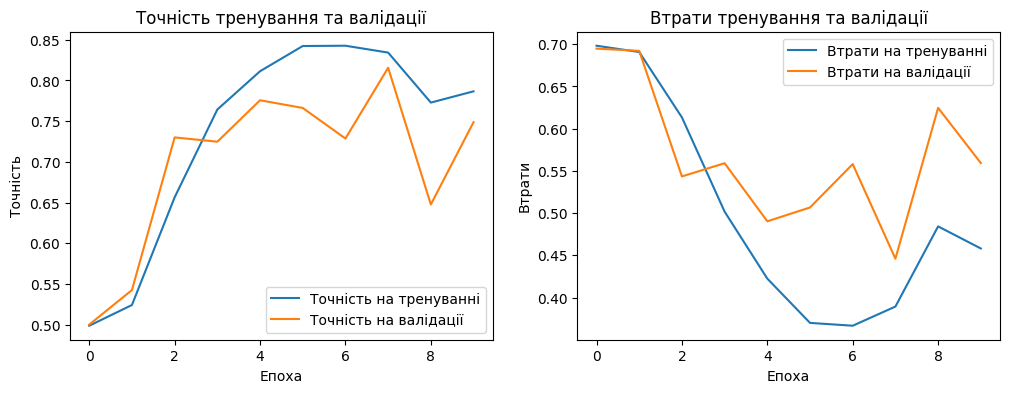

In [56]:
plot_history(hystory_rnn)

In [63]:
model_rnn.save("model_rnn.keras")

## BRNN (Двостороння LSTM)

In [57]:
max_features = 20000
embedding_size = 128
maxlen = 200
lstm_units = 64
dropout_rate = 0.2
epochs = 5

In [58]:
model_bid_rnn = Sequential()
model_bid_rnn.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_bid_rnn.add(Bidirectional(LSTM(lstm_units, recurrent_dropout=dropout_rate, return_sequences=True)))
model_bid_rnn.add(Bidirectional(LSTM(lstm_units, recurrent_dropout=dropout_rate)))
model_bid_rnn.add(Dense(64, activation='relu'))
model_bid_rnn.add(Dense(32, activation='relu'))
model_bid_rnn.add(Dropout(0.25))
model_bid_rnn.add(Dense(1, activation='sigmoid'))

In [59]:
model_bid_rnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 bidirectional (Bidirection  (None, 200, 128)          98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)               

In [60]:
model_bid_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [62]:
history_bid_rnn = model_bid_rnn.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 982s 1s/step - loss: 0.3244 - accuracy: 0.8702 - val_loss: 0.3084 - val_accuracy: 0.8665
Epoch 2/5
782/782 [==============================] - 980s 1s/step - loss: 0.1924 - accuracy: 0.9303 - val_loss: 0.3366 - val_accuracy: 0.8584
Epoch 3/5
782/782 [==============================] - 982s 1s/step - loss: 0.1442 - accuracy: 0.9490 - val_loss: 0.4041 - val_accuracy: 0.8547
Epoch 4/5
782/782 [==============================] - 978s 1s/step - loss: 0.0932 - accuracy: 0.9690 - val_loss: 0.4884 - val_accuracy: 0.8549
Epoch 5/5
782/782 [==============================] - 968s 1s/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.7463 - val_accuracy: 0.8446


In [64]:
predictions_2 = model_bid_rnn.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_2 = [1 if pred > 0.5 else 0 for pred in predictions_2]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Predicted: {binary_predictions_2[i]}, In fact: {y_test[i]}")

782/782 [==============================] - 140s 178ms/step
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 1, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 0
Predicted: 1, In fact: 1


In [65]:

score, acc = model_bid_rnn.evaluate(x_test, y_test, batch_size=batch_size)
print('Test loss:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 140s 179ms/step - loss: 0.7463 - accuracy: 0.8446
Test loss: 0.7463240623474121
Test accuracy: 0.8445600271224976


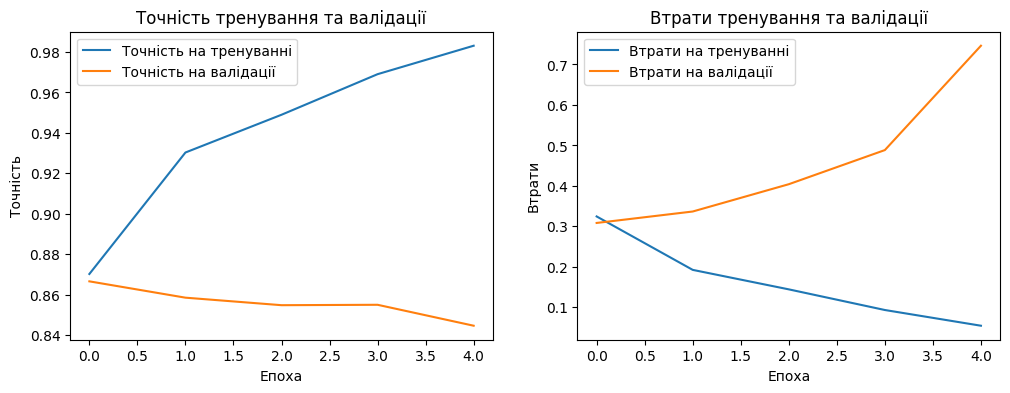

In [66]:
plot_history(history_bid_rnn)

In [67]:
model_bid_rnn.save("model_bid_rnn.keras")

## Deep RNN (Глибока мережа (стек LSTM шарів))

In [68]:
max_features = 20000
embedding_size = 128
maxlen = 200
lstm_units = 64
dropout_rate = 0.2
epochs = 5

In [69]:
# Build the model
model_drnn = Sequential()
model_drnn.add(Embedding(max_features, embedding_size, input_length=maxlen))
model_drnn.add(Bidirectional(LSTM(lstm_units, recurrent_dropout=dropout_rate, return_sequences=True)))


model_drnn.add(LSTM(lstm_units, recurrent_dropout=dropout_rate, return_sequences=True))
model_drnn.add(LSTM(lstm_units, recurrent_dropout=dropout_rate))

model_drnn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_drnn.add(Dense(1, activation='sigmoid'))

In [70]:
model_drnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
model_drnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 200, 128)          98816     
 onal)                                                           
                                                                 
 lstm_10 (LSTM)              (None, 200, 64)           49408     
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                      

In [72]:
history_drnn = model_drnn.fit(x_train, y_train,
                             batch_size=32,
                             epochs=5,
                             validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 987s 1s/step - loss: 0.4966 - accuracy: 0.8101 - val_loss: 0.4474 - val_accuracy: 0.8231
Epoch 2/5
782/782 [==============================] - 975s 1s/step - loss: 0.2487 - accuracy: 0.9068 - val_loss: 0.3492 - val_accuracy: 0.8555
Epoch 3/5
782/782 [==============================] - 974s 1s/step - loss: 0.1763 - accuracy: 0.9392 - val_loss: 0.4377 - val_accuracy: 0.8414
Epoch 4/5
782/782 [==============================] - 962s 1s/step - loss: 0.1224 - accuracy: 0.9608 - val_loss: 0.4425 - val_accuracy: 0.8578
Epoch 5/5
782/782 [==============================] - 974s 1s/step - loss: 0.1062 - accuracy: 0.9658 - val_loss: 0.5000 - val_accuracy: 0.8540


In [74]:
predictions_3 = model_drnn.predict(x_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_3 = [1 if pred > 0.5 else 0 for pred in predictions_3]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Predicted: {binary_predictions_3[i]}, In fact: {y_test[i]}")

782/782 [==============================] - 152s 190ms/step
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 1, In fact: 1
Predicted: 0, In fact: 0
Predicted: 1, In fact: 0
Predicted: 1, In fact: 1


In [75]:
score, acc = model_drnn.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 140s 179ms/step - loss: 0.5000 - accuracy: 0.8540
Test loss: 0.5000149011611938
Test accuracy: 0.8540400266647339


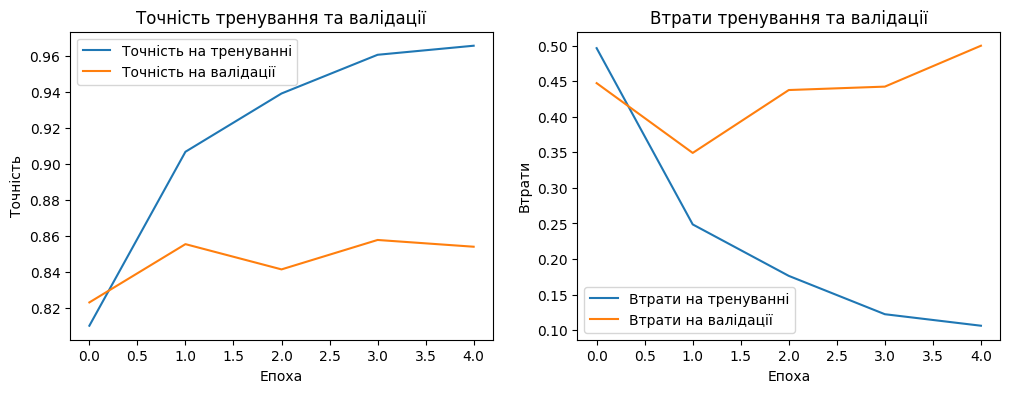

In [76]:
plot_history(history_drnn)

In [77]:
model_drnn.save("model_drnn.keras")

## Висновок

Побудова нейромереж з різнмим шарами (LSTM, Bidirectional, Deep). Пробував декілька варіантів гіперпараметрів, які стосувалися регуляризаторів (шарів dropout, kernel_regularizer=l2(0.01)) і кількості шарів як LSTM, Bidirectional, SimpleRNN, так і внутрішніх (Dense). Найкраще показала себе модель із шарами LSTM i DeepRNNN, яка також мала LSTM всередині. SimpleRNN i BRNN на тестових даних навчальлися гірше, особливо двостороння. Мережа з Simple RNN перенавчилася, бо прибрав регуляризатори і спростив модель, на початку також тестові дані не змінювалися.